# Calgary Rainfall Study - Personal Project
Author: Gustavo Bravo

Dataset: Historical Rainfall - data.calgary.ca - https://data.calgary.ca/Environment/Historical-Rainfall/d9kv-swk3

Data use license: https://data.calgary.ca/stories/s/Open-Calgary-Terms-of-Use/u45n-7awa

Data Range: 1988 - 2021

Have the weather patterns changed throughout the years in the city of Calgary? If so, how have these affected floods, forest fire rates, and other natural disasters?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Historical_Rainfall.csv")
plt.style.use("fivethirtyeight")
plt.rcParams.update({"font.size": 13})

First, to get a feel for how it rains differently in each part of the city, I want to analyze the last 5 years of rain per location

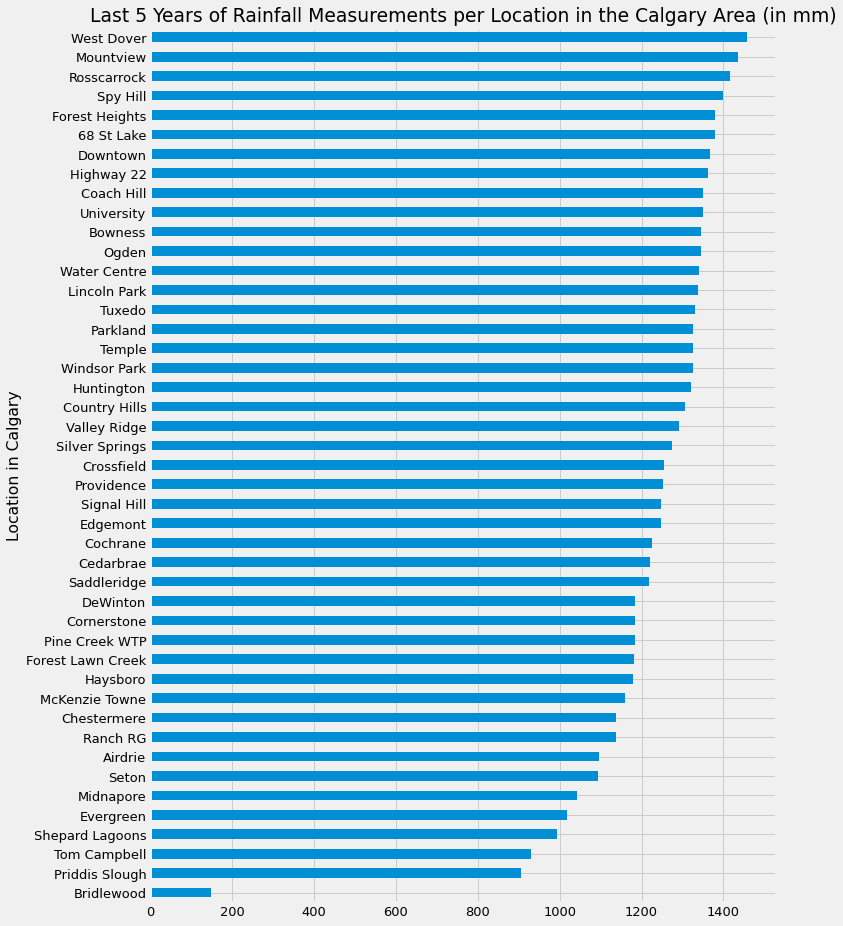

In [4]:
# Rainfaill 2016-2021
last_five_years_df = df.loc[(df["YEAR"] > 2016) & (df["YEAR"] < 2022)]

# By location in calgary
plt.figure(figsize = (10, 15))

last_five_years_df.groupby("NAME")["RAINFALL"].sum().sort_values().plot(
    kind = "barh",
    title = "Last 5 Years of Rainfall Measurements per Location in the Calgary Area (in mm)",
    xlabel = "Location in Calgary"
)
plt.show()

Looks like there are certainly parts of the city that get more rain than others, I want to look at these based on their quadrant of the city (NW, SE, etc.) Here, we will be removing Downtown, Hungtington Hills (as it is split in the middle of east and west), Crossfield, Airdrie, Dewinton, Chestermere, Priddis, Ranch RG, and Cochrane  and looking at them separately

In [5]:
# Create a dictionary containing the location as keys and its ordinal directions as values
# Downtown, Huntington Hills(as it is split in the middle of east and west) crossfield, airdrie, dewinton, chestermere, priddis, Ranch RG, and Cochrane
# are their own categories
ordinal_calgary_dict = {
    "Spy Hill": "NW",
    "University": "NW",
    "Bowness": "NW",
    "Country Hills": "NW",
    "Valley Ridge": "NW",
    "Silver Springs": "NW",
    "Edgemont": "NW",
    "Rosscarrock": "SW",
    "Highway 22": "SW",
    "Coach Hill": "SW",
    "Lincoln Park": "SW",
    "Windsor Park": "SW",
    "Providence": "SW",
    "Signal Hill": "SW",
    "Cedarbrae": "SW",
    "Haysboro": "SW",
    "Evergreen": "SW",
    "Bridlewood": "SW",
    "West Dover": "SE", 
    "Forest Lawn Creek": "SE", 
    "Forest Heights": "SE",
    "Water Centre": "SE", 
    "68 St Lake": "SE", 
    "Ogden": "SE",
    "Parkland": "SE",
    "Pine Creek WTP": "SE",
    "Ernest Morrow": "SE",
    "McKenzie Towne": "SE",
    "Seton": "SE",
    "Midnapore": "SE",
    "Shepard Lagoons": "SE",
    "Mountview": "NE", 
    "Tuxedo": "NE",
    "Temple": "NE",
    "Saddleridge": "NE",
    "Cornerstone": "NE",
    "Tom Campbell": "NE"
}

# Clean data a bit and map dictionary values to new column based on the key
df["ORDINAL_DIRECTION"] = df["NAME"].map(ordinal_calgary_dict).fillna("Other")
df.dropna()

,CHANNEL,NAME,YEAR,TIMESTAMP,RAINFALL,ID,ORDINAL_DIRECTION
0,44,Forest Lawn Creek,2021,2021/05/01 02:40:00 PM,0.2,2021-05-01T14:40:00-44,SE
1,48,Seton,2021,2021/05/01 03:35:00 PM,0.2,2021-05-01T15:35:00-48,SE
2,17,Windsor Park,2021,2021/05/01 03:40:00 PM,0.2,2021-05-01T15:40:00-17,SW
3,17,Windsor Park,2021,2021/05/01 03:45:00 PM,0.2,2021-05-01T15:45:00-17,SW
4,18,Cedarbrae,2021,2021/05/01 03:45:00 PM,0.2,2021-05-01T15:45:00-18,SW
...,...,...,...,...,...,...,...
962658,2,Silver Springs,2020,2020/09/30 05:45:00 AM,0.2,2020-09-30T05:45:00-02,NW
962659,3,Edgemont,2020,2020/09/30 05:45:00 AM,0.2,2020-09-30T05:45:00-03,NW
962660,1,Spy Hill,2020,2020/09/30 05:50:00 AM,0.2,2020-09-30T05:50:00-01,NW
962661,5,University,2020,2020/09/30 05:55:00 AM,0.2,2020-09-30T05:55:00-05,NW


Now let's see how each quadrant stacks up against each other on total rainfall for the last 50 years

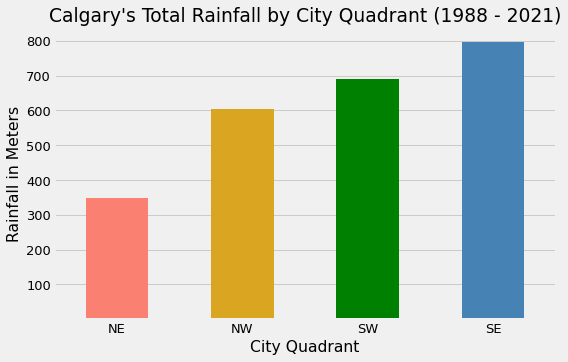

In [6]:
plt.figure(figsize = (8, 5))
df[df['ORDINAL_DIRECTION'] != 'Other'].groupby("ORDINAL_DIRECTION")["RAINFALL"].sum().sort_values().plot(
    kind = "bar",
    title = "Calgary's Total Rainfall by City Quadrant (1988 - 2021)",
    xlabel = "City Quadrant",
    ylabel = "Rainfall in Meters",
    rot = "0",
    color = ["salmon", "goldenrod", "green", "steelblue", 'plum']
)
plt.grid(axis = "x")
plt.yticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],[100, 200, 300, 400, 500, 600, 700, 800])
plt.show()

Just for further inspection, we will breakdown the "other" category and inspect it directly

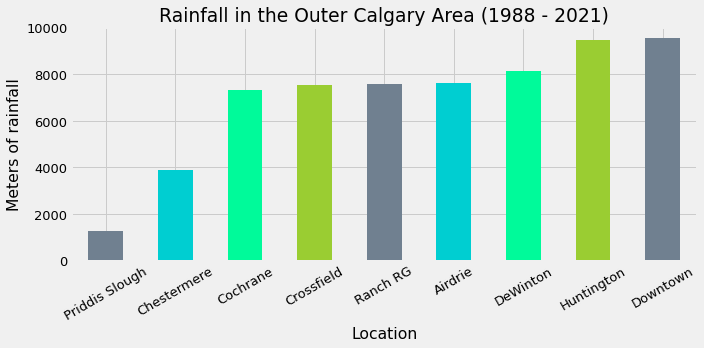

In [51]:
plt.figure(figsize = (10, 4))
other_df = df[df['ORDINAL_DIRECTION'] == 'Other']
other_df.groupby('NAME')['RAINFALL'].sum().sort_values().plot(
    kind='bar',
    title='Rainfall in the Outer Calgary Area (1988 - 2021)',
    rot=30,
    xlabel = 'Location',
    ylabel = 'Meters of rainfall',
    color = ['slategray', 'darkturquoise', 'mediumspringgreen', 'yellowgreen']
)
plt.show()

From the above visuals we can infer that in the last 50 years the majority of Calgary's rainfall occurs in the southern regions, with the North East being the driest quadrant in the city.

This data may by skewed by the number of collection centers that exist in the southern regions, so keep that in mind.

Idea - create a stacked bar graph of the last 50 years of rain where year is the x value and its divided per column

# Rainfall - Looking at the data by day

Now we will transform the data by grouping it by day, and finding the total rain on that particular day

In [8]:
# Convert the timestamp column into a datetime object
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df['DAY'] = df['TIMESTAMP'].dt.day
df['MONTH'] = df['TIMESTAMP'].dt.month
df['YEAR'] = df['TIMESTAMP'].dt.year

<Figure size 576x432 with 0 Axes>

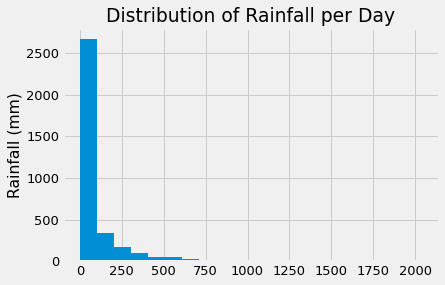

In [52]:
plt.figure(figsize=(8, 6))

rainfall_by_day = pd.DataFrame(df.groupby(['YEAR', 'MONTH', 'DAY'], as_index=False)['RAINFALL'].sum())

rainfall_by_day.hist('RAINFALL', bins=20)
plt.ylabel('Rainfall (mm)')
plt.title('Distribution of Rainfall per Day')
plt.show()

We can see that Calgary is not too much a rainy city, considering we are omitting the times when it does not rain, we can see that on the largest portion of the day, we are only measuring the minimum amount of rain which is 0.2mm of rain, lets have a close look by omitting the days when calgary gets less than 5cms, 10cms, 15cms and 20cms, of rain per day seperately and let's see if this distribution changes

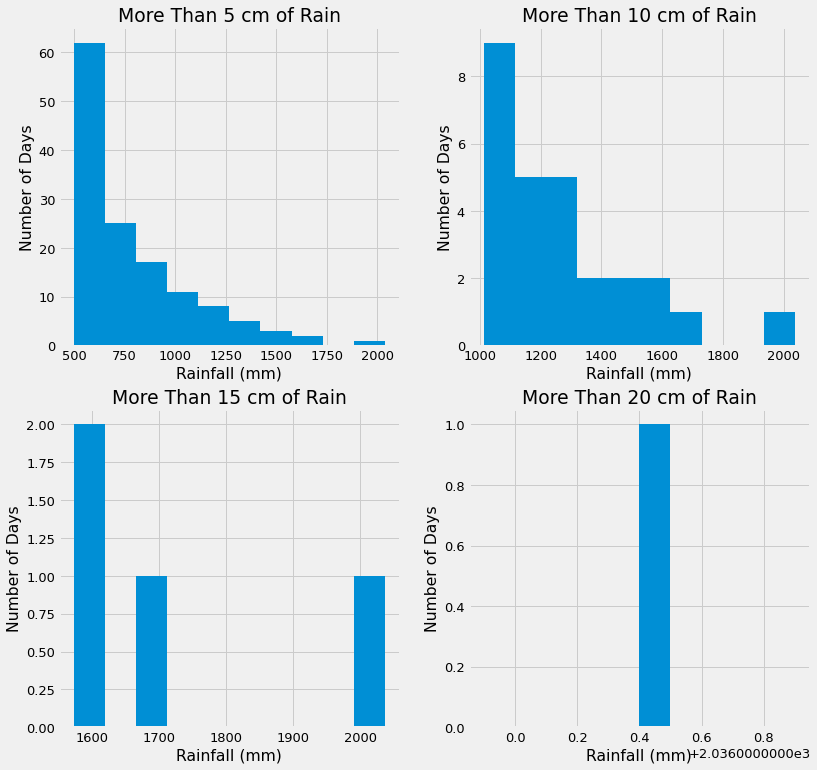

In [71]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

# 5cms
grtr_5 = rainfall_by_day[rainfall_by_day['RAINFALL'] > 500]

# 10 cms
grtr_10 = rainfall_by_day[rainfall_by_day['RAINFALL'] > 1000]

# 15cms
grtr_15 = rainfall_by_day[rainfall_by_day['RAINFALL'] > 1500]

# 20cms
grtr_20 = rainfall_by_day[rainfall_by_day['RAINFALL'] > 2000]

count = 0
for ax, df in zip([ax1, ax2, ax3, ax4], [grtr_5, grtr_10, grtr_15, grtr_20]):
    count += 5
    ax.hist(df['RAINFALL'], bins=10)
    ax.set_ylabel("Number of Days")
    ax.set_xlabel("Rainfall (mm)")
    ax.set_title(f"More Than {count} cm of Rain")

It looks like Calgary does not have too much continuous rain, with there only being one day in the whole of this dataset (1988-2021) where it rained more than 20cms

# Summary Statistics

In [77]:
rain_std = rainfall_by_day['RAINFALL'].std()
rain_mean = rainfall_by_day['RAINFALL'].mean()

print(f"The average rainfall by day in Calgary is {rain_mean/100:.2f}cm \
        \nwith a standard deviation of {rain_std/100:.2f}cm")

The average rainfall by day in Calgary is 0.89cm         
with a standard deviation of 1.79cm
